In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

uri = '/content/drive/Shareddrives/Colab_Grupo2/Colab/Data/data_classified.csv'

data = pd.read_csv(uri)	


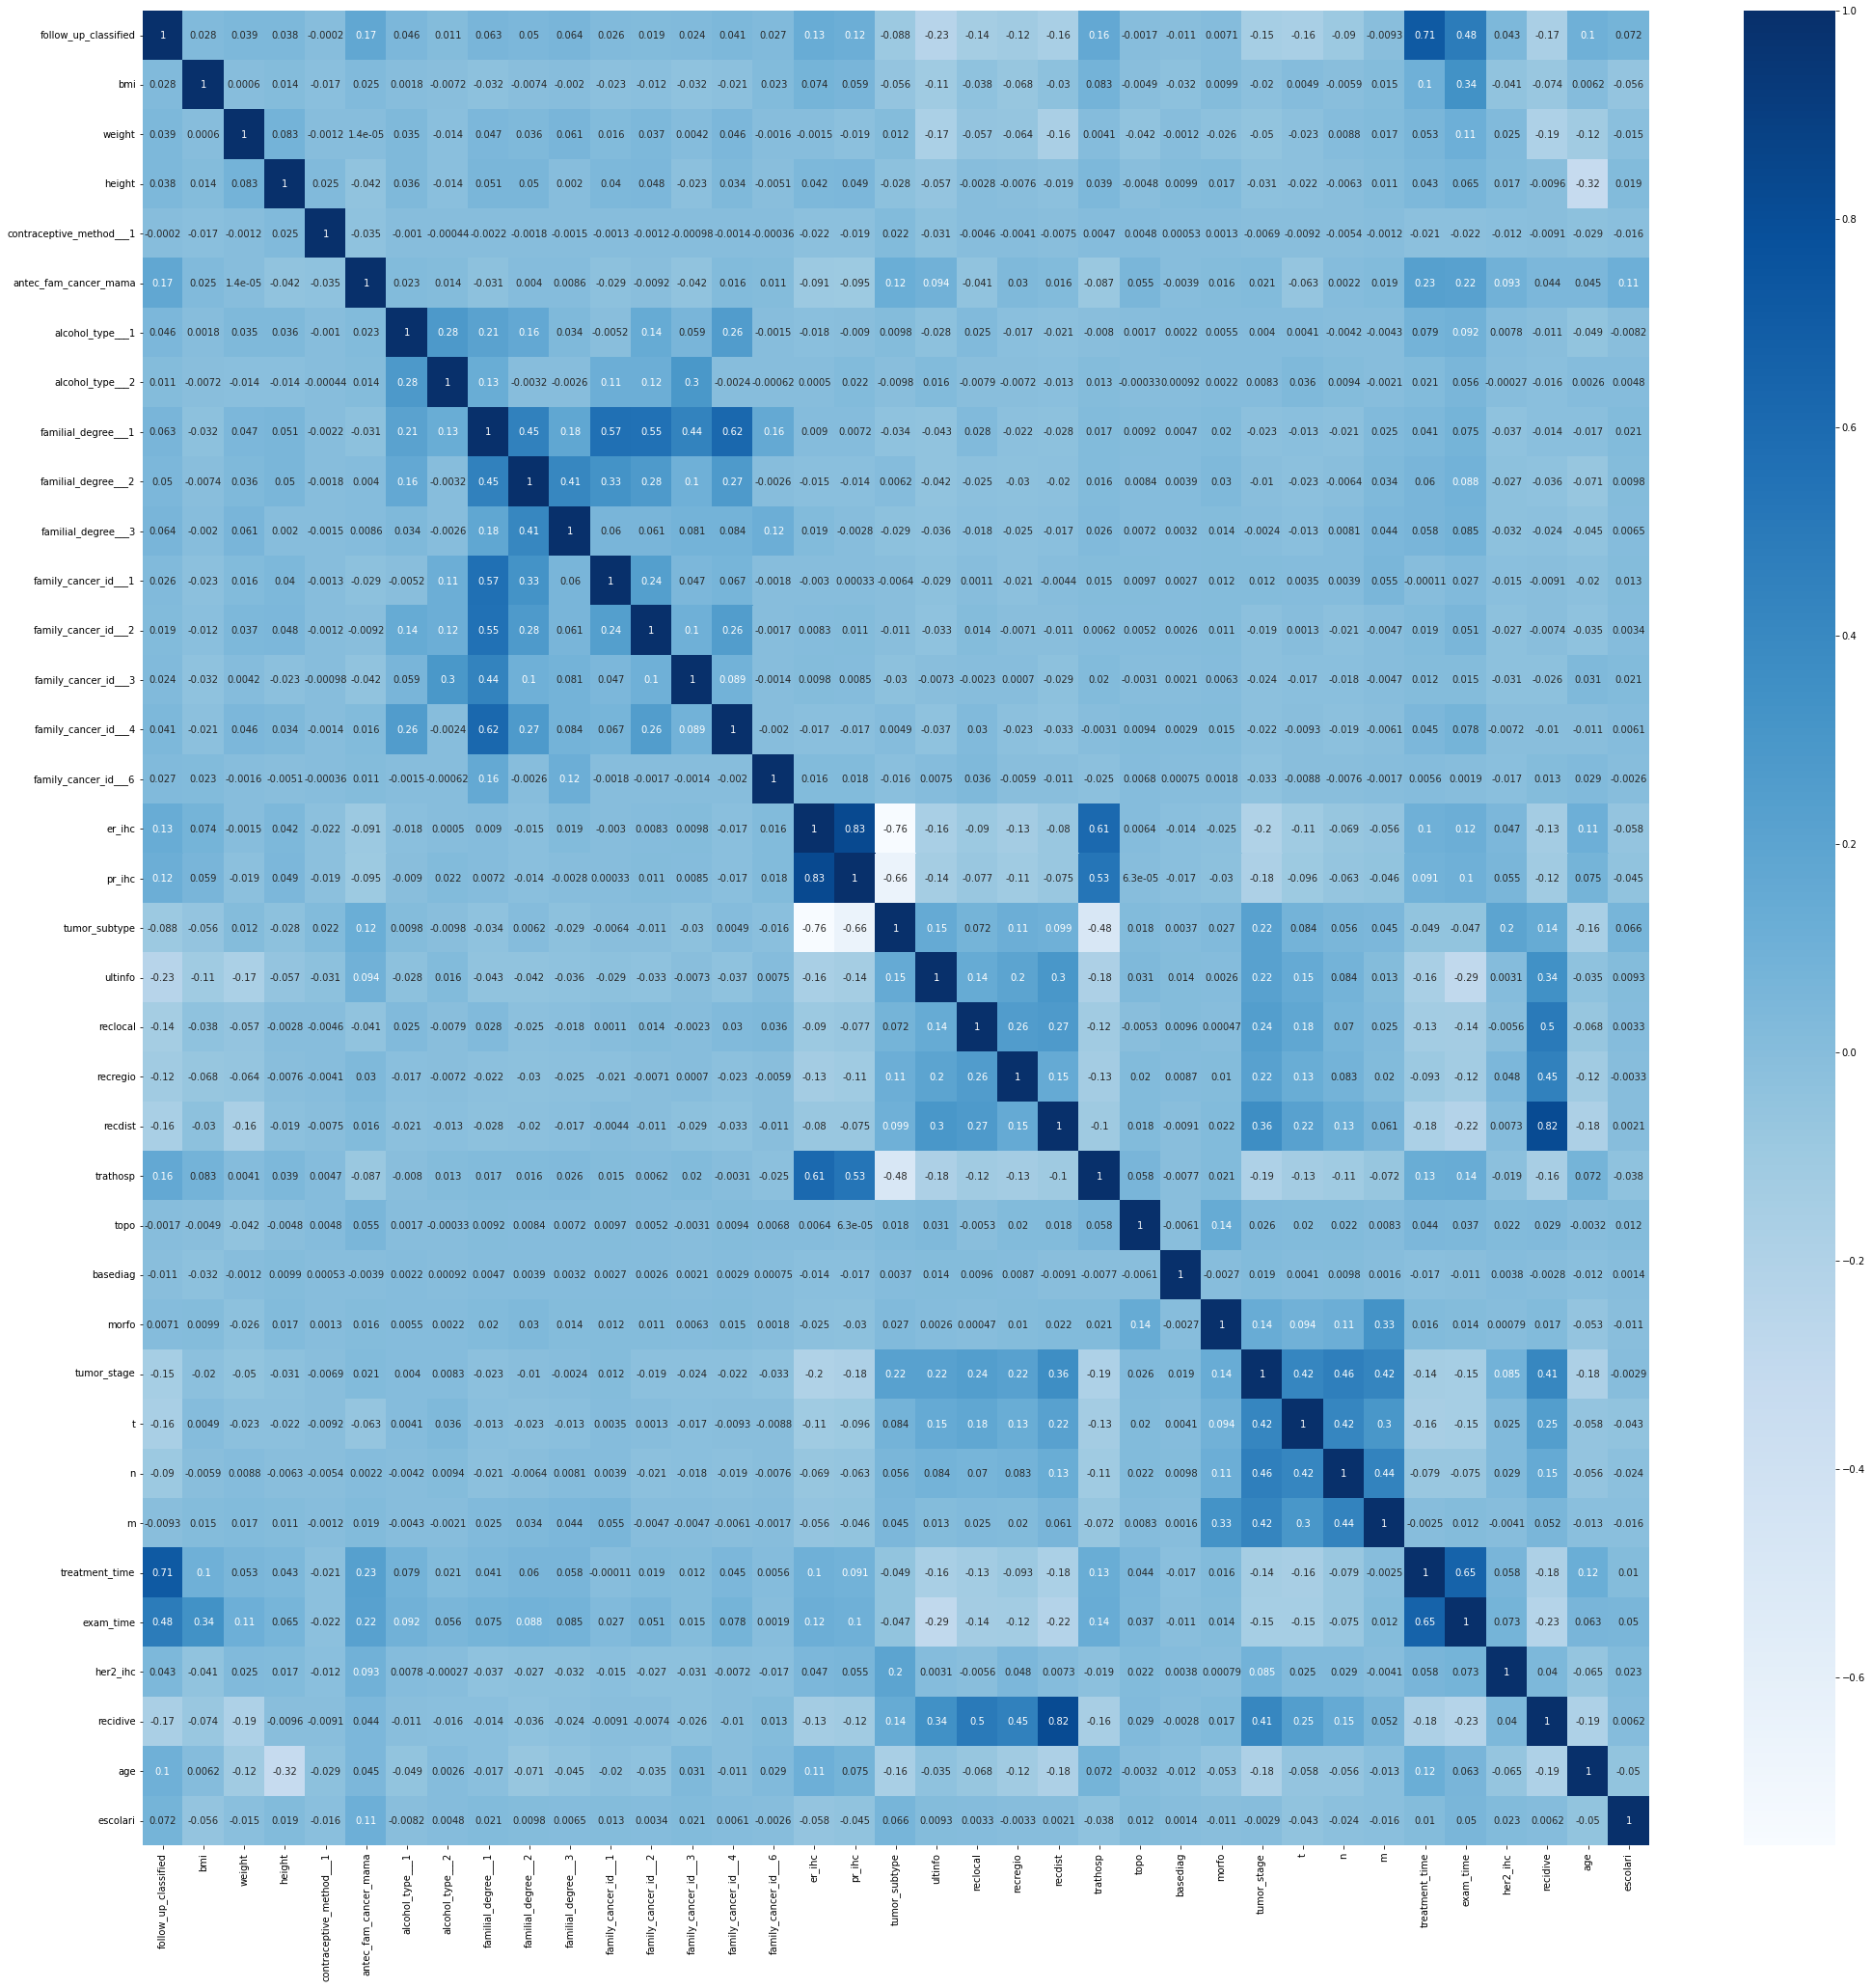

In [85]:
corrmat = data.corr()
top_corr_features = corrmat.index
#plota
plt.figure(figsize=(35,35))
g = sns.heatmap(data[top_corr_features].corr(),
                annot=True,
                cmap="Blues")

In [86]:
X = data.drop('follow_up_classified', axis = 1).copy()
y = data['follow_up_classified'] 

In [87]:
f_classif = SelectKBest(score_func = f_classif, k=20)
fit = f_classif.fit(X,y)

In [88]:
features = fit.transform(X)

In [89]:
cols = fit.get_support(indices=True)
data = data.iloc[:,cols ]

In [90]:
data = pd.merge(data, y, left_index=True, right_index=True)

In [91]:
data.to_csv("/content/drive/Shareddrives/Colab_Grupo2/Colab/Data/dataFrameSelecionado.csv", index = False)

In [92]:
data.head()

,bmi,contraceptive_method___1,family_cancer_id___6,er_ihc,pr_ihc,tumor_subtype,ultinfo,reclocal,recregio,recdist,...,morfo,tumor_stage,t,m,treatment_time,exam_time,her2_ihc,recidive,age,follow_up_classified
0,0.489334,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,85003.0,10.0,11.0,0.0,4382.9100,1826.2125,1.0,1.0,27027.9450,2
1,1.302154,0.0,0.0,1.0,1.0,3.0,4.0,0.0,0.0,0.0,...,85003.0,21.0,2.0,0.0,1826.2125,1460.9700,4.0,0.0,20818.8225,2
2,4.553521,0.0,0.0,1.0,0.0,2.0,2.0,1.0,1.0,0.0,...,85003.0,31.0,3.0,0.0,2921.9400,4382.9100,1.0,1.0,26297.4600,2
3,0.605163,0.0,0.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,...,84803.0,21.0,2.0,0.0,3287.1825,1460.9700,4.0,0.0,25932.2175,2
4,0.523438,0.0,0.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,...,85003.0,22.0,2.0,0.0,2921.9400,1460.9700,4.0,0.0,20453.5800,2
